# Insurance claims - Data Cleaning / Viz / Analyzing / Feature Selecting

1) Little taste of data
2) Data Cleaning / Data Viz / Data Analysis
   -  NaN
   -  ?
3) Feature Analysis
   - HistPlot incl. kde line / Outliers / Heatmap 
   - Categorical (discrete) /
4) Statistical Test

## Import libraries/ packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import ttest_ind, ks_2samp, mannwhitneyu
from scipy.stats import chi2_contingency, chi2


In [91]:
#read csv-file
df=pd.read_csv("insurance_claims.csv", parse_dates=["policy_bind_date", "incident_date"], index_col="policy_number")

#rename columns
rename ={'capital-gains':'capital_gains','capital-loss': 'capital_loss'}
df.rename(columns=rename, inplace=True)

# 1. Litte taste of data

C:\Users\kuhza\AppData\Local\Temp\ipykernel_10516\3842616433.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\kuhza\AppData\Local\Temp\ipykernel_10516\3842616433.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=45)
C:\Users\kuhza\AppData\Local\Temp\ipykernel_10516\3842616433.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2, 1].set_xticklabels(ax[2, 1].get_xticklabels(), rotation=45)
C:\Users\kuhza\AppData\Local\Temp\ipykernel_10516\3842616433.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

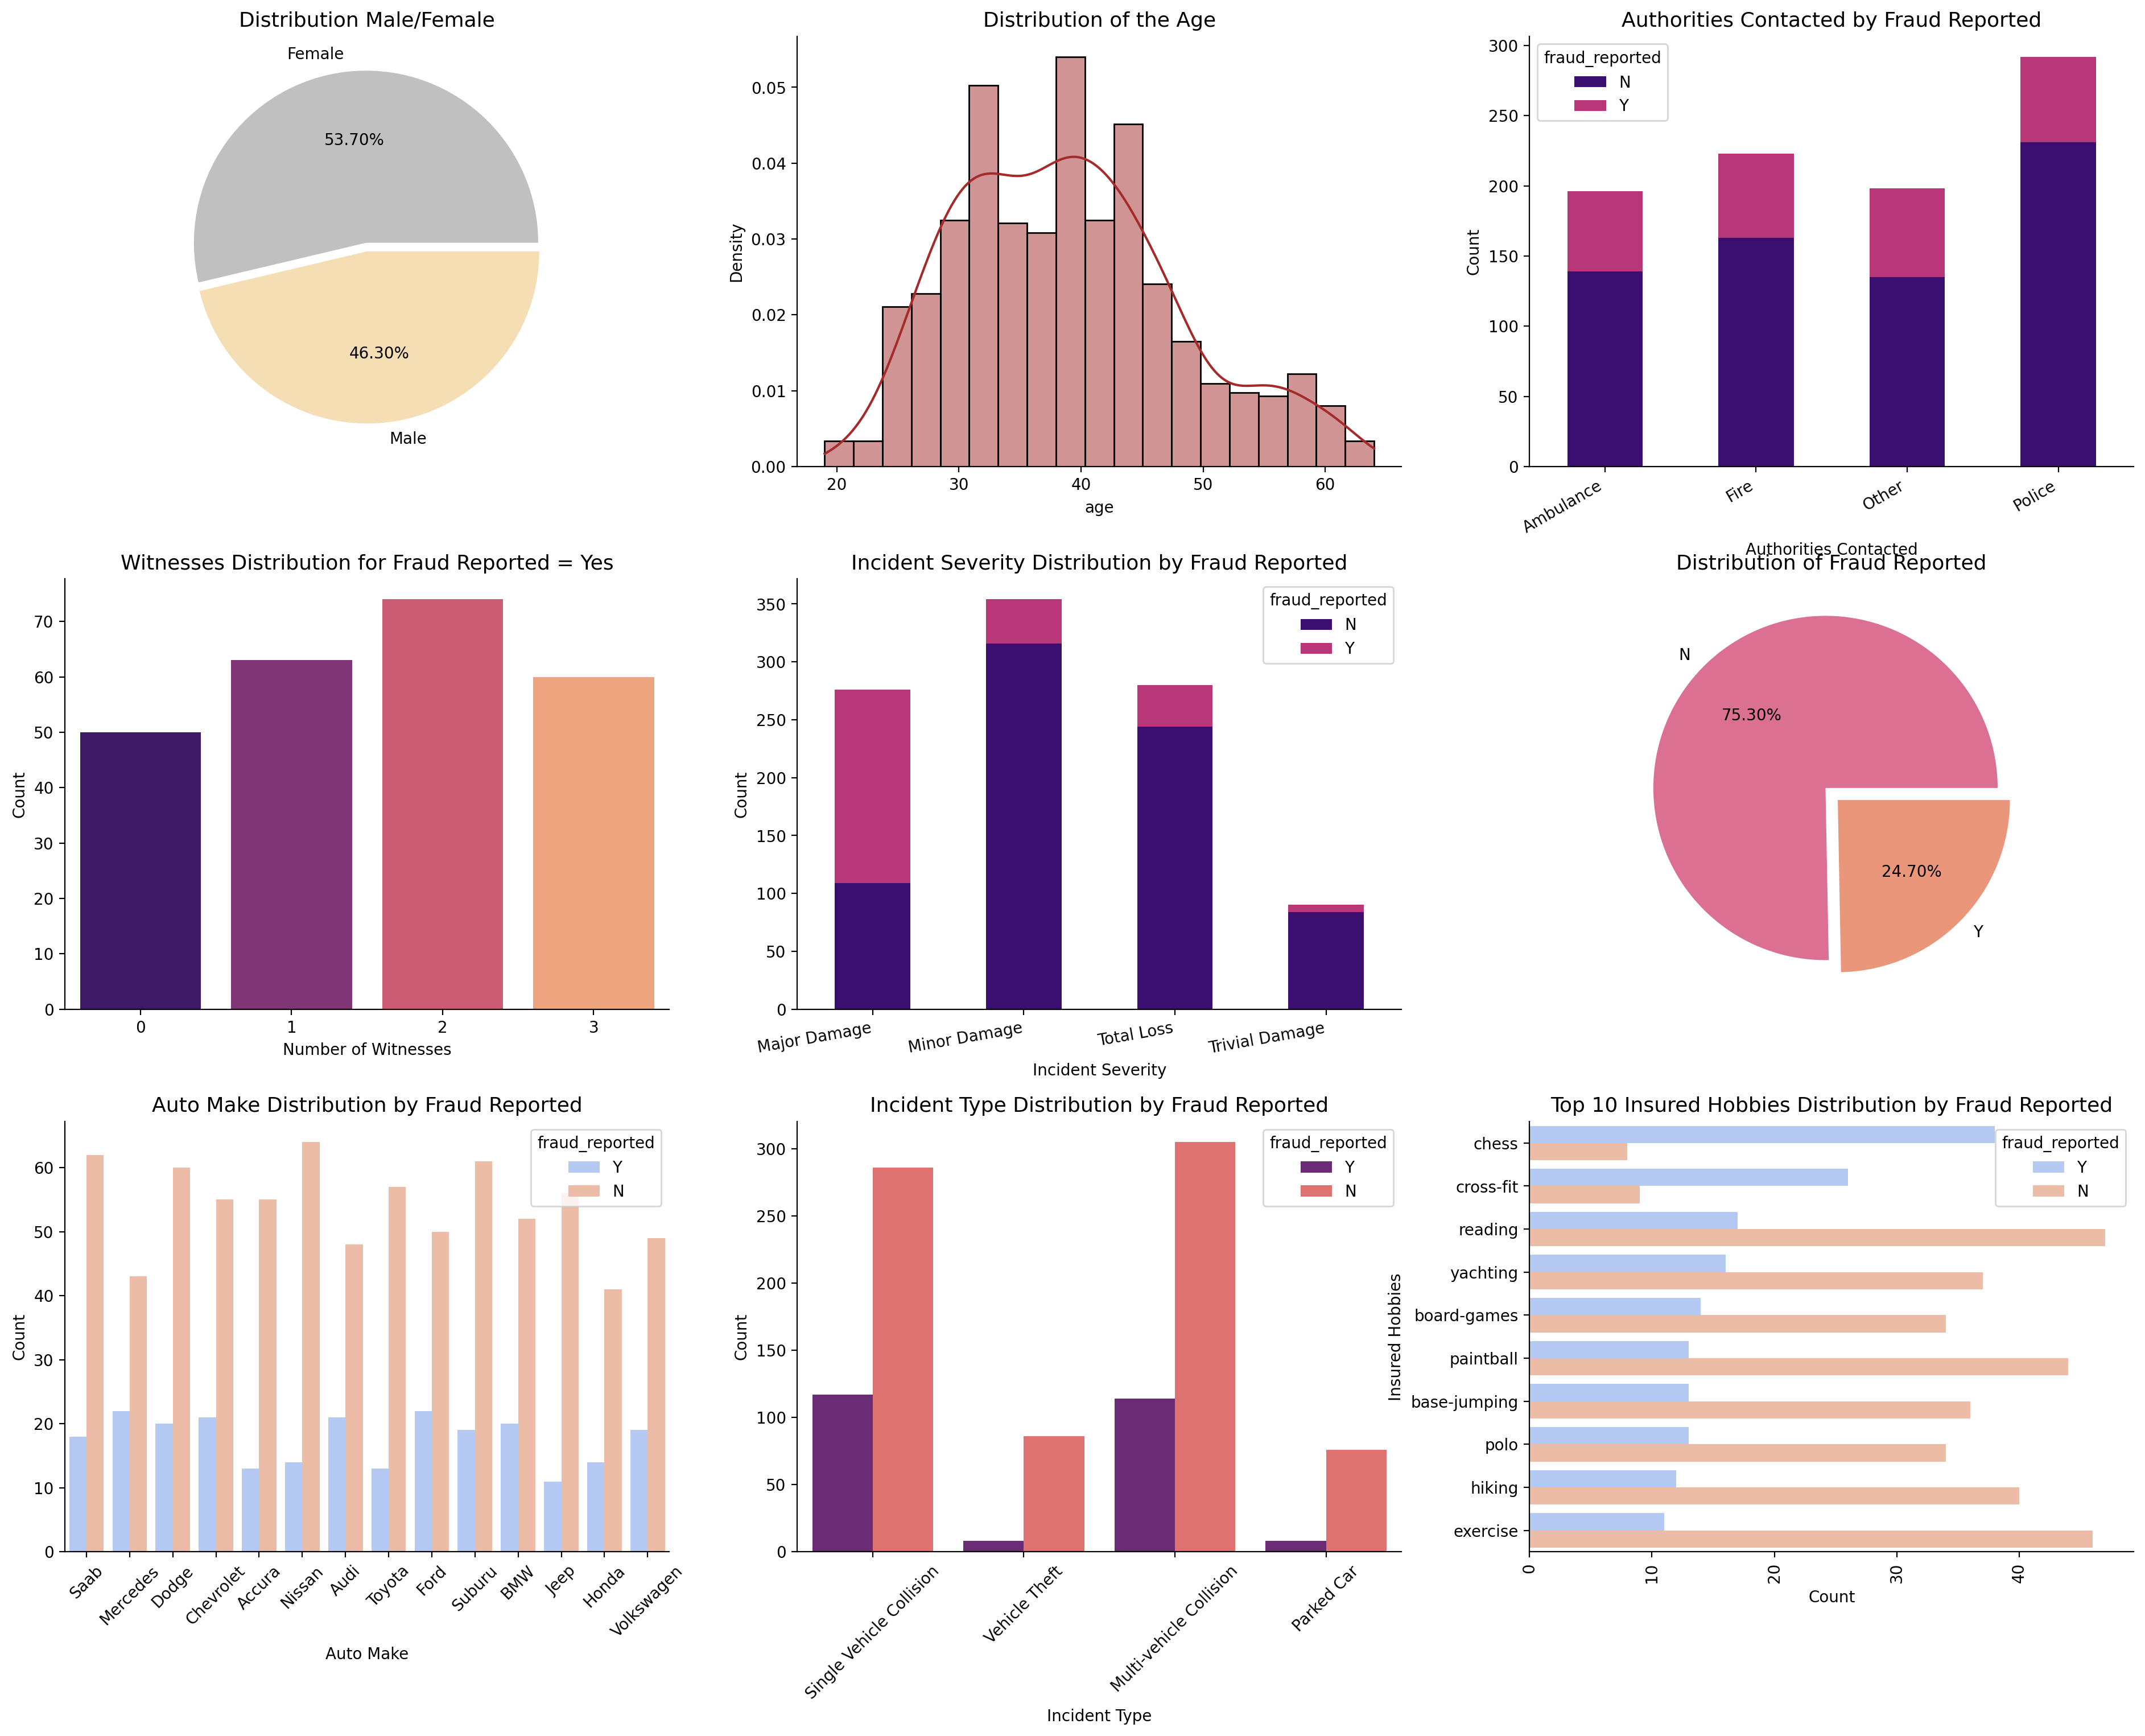

In [92]:
colors = plt.cm.magma([0.2, 0.5, 0.7, 0.9])
fig, ax = plt.subplots(3, 3, figsize=(20, 15), dpi=200)
fig.tight_layout(pad=5)

# 1. insured sex distribution
ax[0, 0].pie(
    df['insured_sex'].value_counts(normalize=True),
    labels=['Female', 'Male'],
    explode=[0.05, 0],
    autopct="%0.2f%%",
    colors=["silver", "wheat"]
)
ax[0, 0].set_title('Distribution Male/Female', fontsize=13)

# 2. age distribution
sns.histplot(
    ax=ax[0, 1],
    x="age",
    data=df,
    color="brown",
    stat="density",
    kde=True
)
ax[0, 1].set_title('Distribution of the Age', fontsize=13)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['top'].set_visible(False)

# 3.Authorities contacted by fraud reported (violin plot)
pd.crosstab(df['authorities_contacted'], df['fraud_reported']).plot(
    kind='bar', 
    stacked=True, 
    ax=ax[0, 2], 
    color=colors  # Set the colors manually
)
ax[0, 2].set_title('Authorities Contacted by Fraud Reported', fontsize=13)  # Title
ax[0, 2].spines['right'].set_visible(False)
ax[0, 2].spines['top'].set_visible(False)
ax[0, 2].set_xlabel('Authorities Contacted')
ax[0, 2].set_ylabel('Count')  # Y-axis label
# Rotate x-axis labels
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=30, ha='right')


# 4. witness distribution for fraud reported = yes, colorpalette magma
sns.countplot(
    x='witnesses',data=df[df['fraud_reported'] == 'Y'], palette='magma', ax=ax[1, 0])
ax[1, 0].set_title('Witnesses Distribution for Fraud Reported = Yes', fontsize=13)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].set_xlabel('Number of Witnesses')
ax[1, 0].set_ylabel('Count')




# 5. Stacked bar chart incident_severity distribution to fraud reported
pd.crosstab(df['incident_severity'], df['fraud_reported']).plot(
    kind='bar', 
    stacked=True, 
    ax=ax[1, 1], 
    color=colors  # Set the colors manually
)
ax[1, 1].set_title('Incident Severity Distribution by Fraud Reported', fontsize=13)  # Title
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].set_xlabel('Incident Severity')
ax[1, 1].set_ylabel('Count')  # Y-axis label
# Rotate x-axis labels
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=10, ha='right')



# 6. fraud reported distribution
ax[1, 2].pie(
    df["fraud_reported"].value_counts(normalize=True),
    labels=df['fraud_reported'].value_counts().index.astype(str),
    explode=[0.05] * len(df['fraud_reported'].value_counts()),
    autopct="%0.2f%%",
    colors=["palevioletred", "darksalmon", "lightcoral"]
)
ax[1, 2].set_title('Distribution of Fraud Reported', fontsize=13)



# 7. auto_make distribution hue=fraud_reported, x axis auto make labels rotated
sns.countplot(x='auto_make',data=df, hue='fraud_reported', palette='coolwarm',  # Updated color palette
ax=ax[2, 0])
ax[2, 0].set_title('Auto Make Distribution by Fraud Reported', fontsize=13)
ax[2, 0].spines['right'].set_visible(False)
ax[2, 0].spines['top'].set_visible(False)
ax[2, 0].yaxis.set_ticks_position('left')
ax[2, 0].xaxis.set_ticks_position('bottom')
ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=45)
ax[2, 0].set_xlabel('Auto Make')
ax[2, 0].set_ylabel('Count')


# 8. incident_type distribution to fraud reported, rotate xlabels
sns.countplot(x='incident_type',data=df, hue='fraud_reported', palette='magma', ax=ax[2, 1])
ax[2, 1].set_title('Incident Type Distribution by Fraud Reported', fontsize=13)     # Title
ax[2, 1].spines['right'].set_visible(False)
ax[2, 1].spines['top'].set_visible(False)
ax[2, 1].set_xlabel('Incident Type')
ax[2, 1].set_xticklabels(ax[2, 1].get_xticklabels(), rotation=45)
ax[2, 1].set_ylabel('Count')    # Y

# 9. chart insured_hobbies to fraud reported, rotate xlabels
# Filter the data for fraud_reported == 'Y' and get the top 10 hobbies
top_hobbies = (
    df[df['fraud_reported'] == 'Y']['insured_hobbies']
    .value_counts()
    .head(10)
    .index)
# Filter the original DataFrame to include only the top 10 hobbies
filtered_df = df[df['insured_hobbies'].isin(top_hobbies)]

# Sort the filtered DataFrame by the count of fraud_reported='Y' in descending order
sorted_hobbies = (
    filtered_df[filtered_df['fraud_reported'] == 'Y']['insured_hobbies']
    .value_counts()
    .index
)
filtered_df['insured_hobbies'] = pd.Categorical(
    filtered_df['insured_hobbies'], categories=sorted_hobbies, ordered=True
)
# Plot the countplot for the filtered data
sns.countplot(
    y='insured_hobbies',
    data=filtered_df,
    hue='fraud_reported',
    palette='coolwarm',
    ax=ax[2, 2])
ax[2, 2].set_title('Top 10 Insured Hobbies Distribution by Fraud Reported', fontsize=13)  # Title
ax[2, 2].spines['right'].set_visible(False)
ax[2, 2].spines['top'].set_visible(False)
ax[2, 2].set_xlabel('Count')
ax[2, 2].set_ylabel('Insured Hobbies')  # Y-axis label
ax[2, 2].set_xticklabels(ax[2, 2].get_xticklabels(), rotation=90)

# Show the plot and save the figure
plt.show()

# 2. Data Cleaning / Data Viz / Data Analysis

## 2.1 NaN - values

Columns with nan-values:
authorities_contacted      91
_c39                     1000
dtype: int64




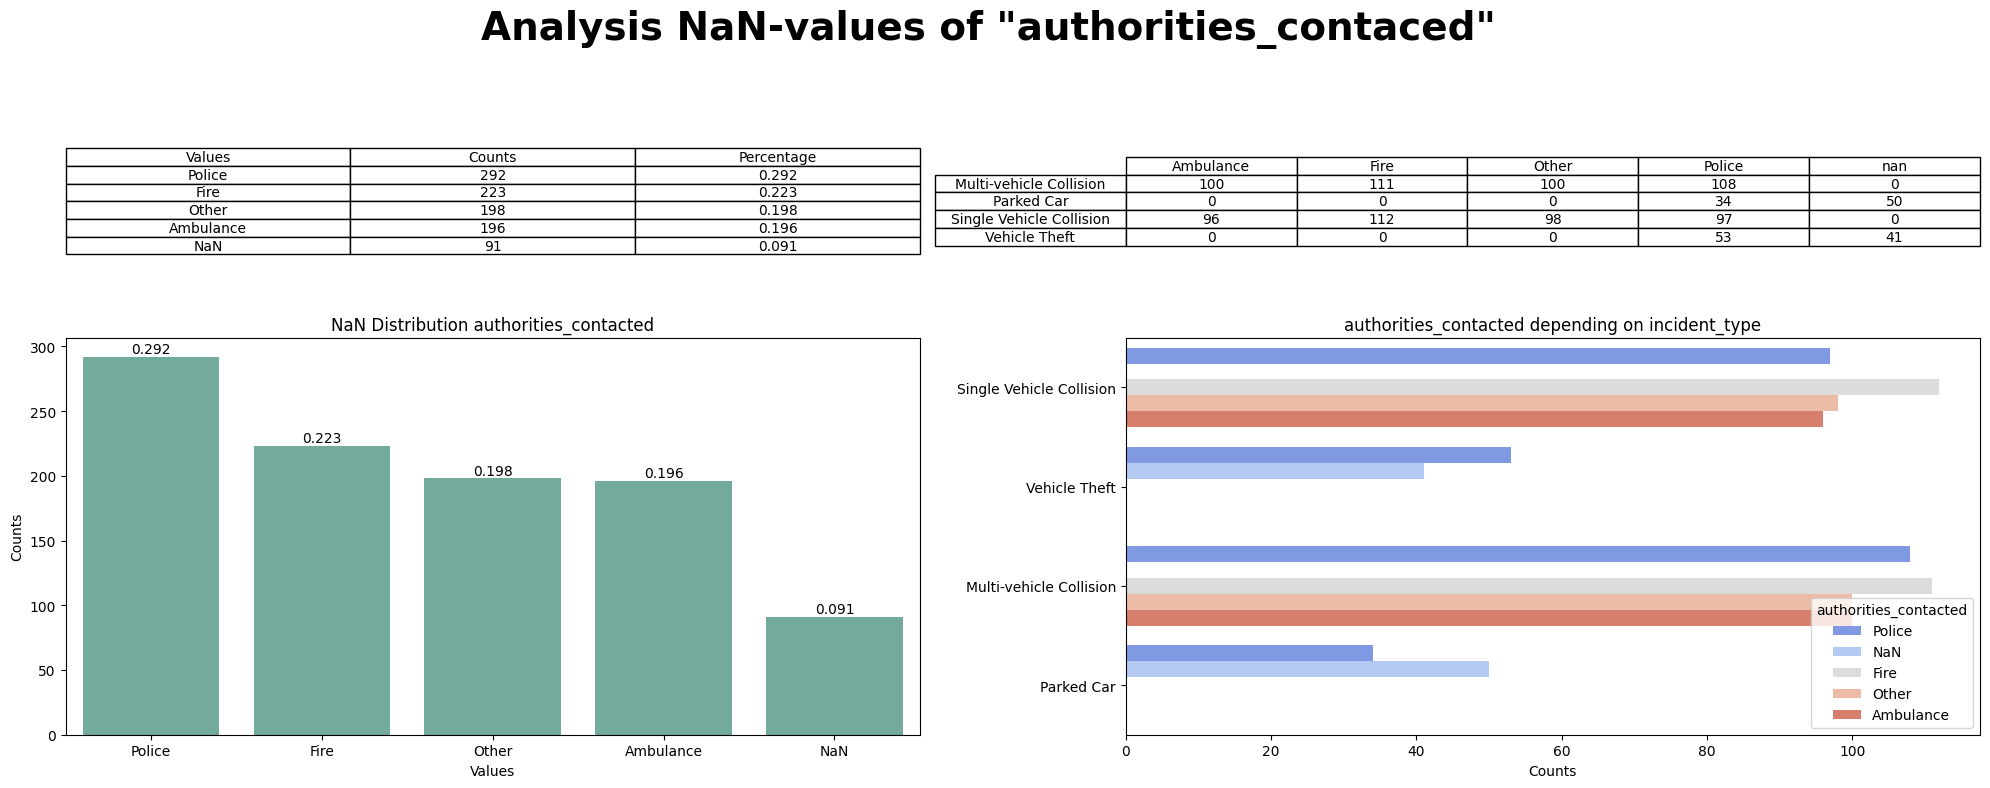

In [ ]:
#identify columns with nan-values
print('Columns with nan-values:')
print(df.isna().sum()[df.isna().sum() > 0])
print("\n")

# drop _c39 -colum
df=df.drop('_c39', axis=1)

value_counts = df['authorities_contacted'].fillna('NaN').value_counts().rename_axis('Values').reset_index(name='Counts')
total = value_counts['Counts'].sum()
value_counts['Percentage'] = (value_counts['Counts'] / total).round(3)

crosstab = pd.crosstab(df['incident_type'], df['authorities_contacted'], dropna=False).round(2)


fig, axes = plt.subplots(2, 2, figsize=(20, 8), gridspec_kw={'height_ratios': [1, 2]})

# (value_counts)
axes[0, 0].axis('off')
table1 = axes[0, 0].table(
    cellText=value_counts.values,
    colLabels=value_counts.columns,
    loc='center'
)
table1.auto_set_font_size(False)
table1.set_fontsize(10)
for cell in table1.get_celld().values():
    cell.set_text_props(ha='center', va='center')

# (crosstab)
axes[0, 1].axis('off')
table2 = axes[0, 1].table(
    cellText=crosstab.values,
    rowLabels=crosstab.index,
    colLabels=crosstab.columns,
    loc='center'
)
table2.auto_set_font_size(False)
table2.set_fontsize(10)
for cell in table2.get_celld().values():
    cell.set_text_props(ha='center', va='center')

# (value_counts)
sns.barplot(x='Values', y='Counts', data=value_counts, color='#69b3a2', ax=axes[1, 0])
for i, row in value_counts.iterrows():
    axes[1, 0].text(
        i,
        row['Counts'] + 0.5,
        f"{row['Percentage']:.3f}",
        ha='center',
        va='bottom',
        fontsize=10
    )
axes[1, 0].set_title('NaN Distribution authorities_contacted')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Counts')

#  (incident_type vs authorities_contacted)
sns.countplot(
    data=df.fillna("NaN"),
    y='incident_type',
    hue='authorities_contacted',
    palette='coolwarm',
    ax=axes[1, 1]
)
axes[1, 1].set_title('authorities_contacted depending on incident_type')
axes[1, 1].set_xlabel('Counts')
axes[1, 1].set_ylabel('')

fig.suptitle('Analysis NaN-values of "authorities_contacted" ', fontsize=28, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretation / Evaluation
- Missing values (NaN) in the authorities_contacted column are only associated with the incident types "Vehicle Theft" and "Parked Car". In both cases, only the Police were contacted.
- Police is also the most frequently contacted authority overall.
- Therefore, all missing values will be replaced with "Police"

## 2.2 ?-values

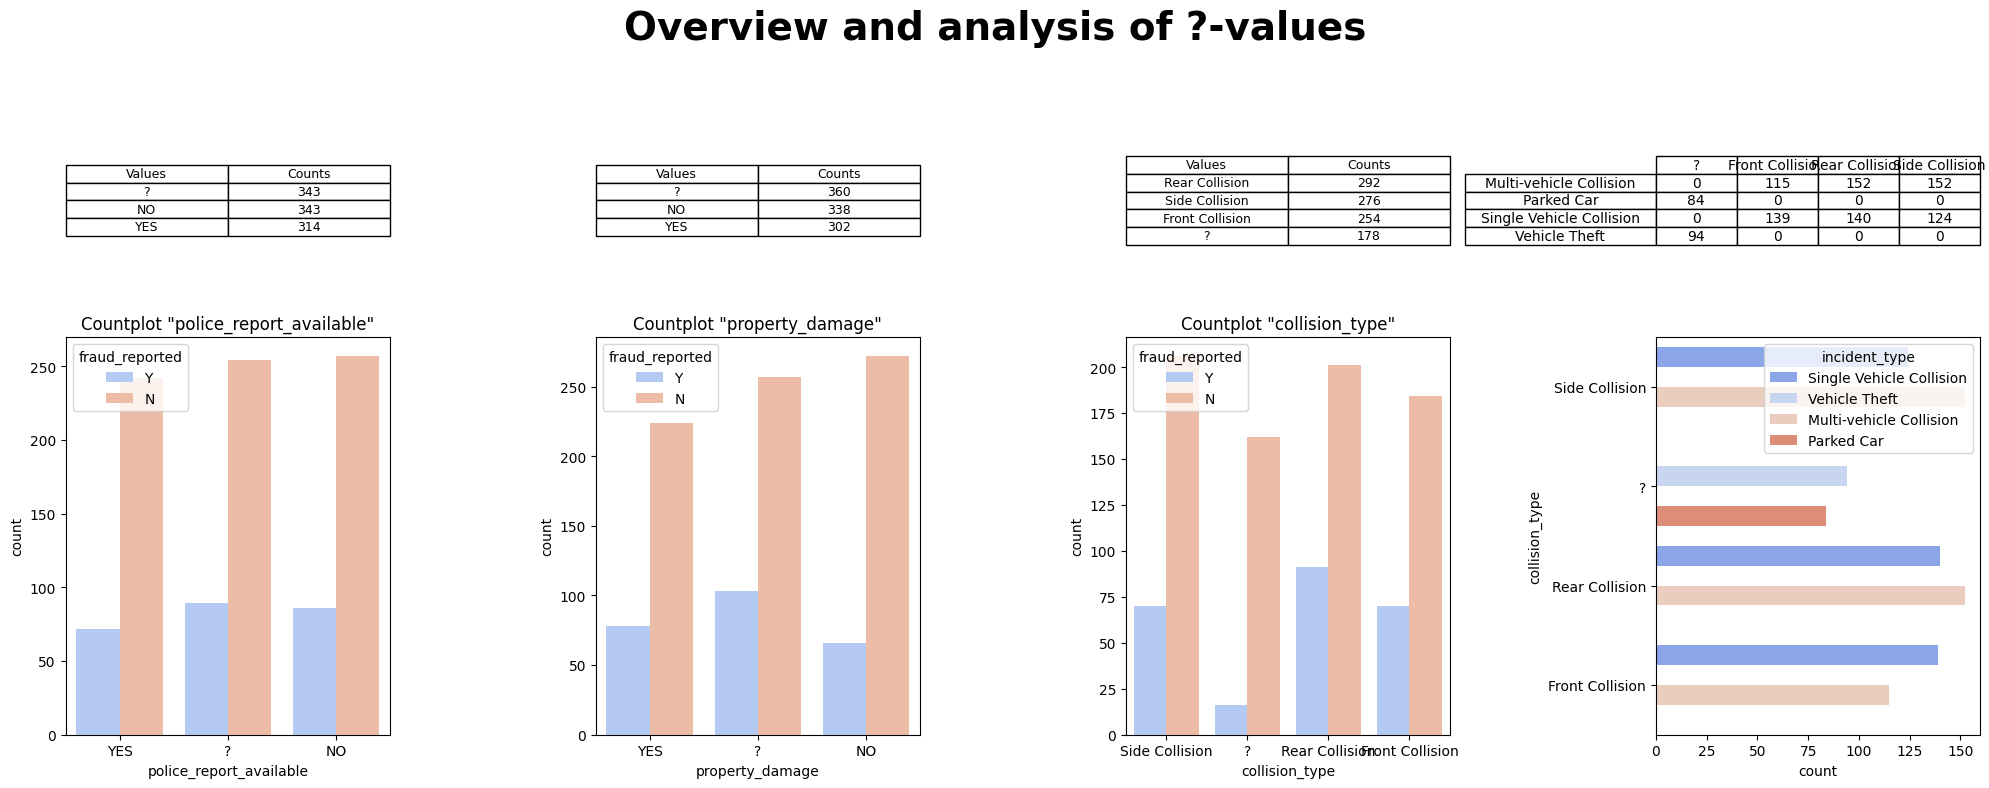

In [ ]:
#Setup plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8),gridspec_kw={'height_ratios': [1, 2]})

#relevant columns
col_question =["police_report_available", "property_damage","collision_type"]

#plot
for i, col in enumerate(df[col_question]):
    # Value Counts
    value_counts = df[col].value_counts(dropna=False).rename_axis('Values').reset_index(name='Counts')

    axes[0, i].axis('off')  
    table = axes[0, i].table(
        cellText=value_counts.values,
        colLabels=value_counts.columns,
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    
    for cell in table.get_celld().values():
        cell.set_text_props(ha='center', va='center')

    sns.countplot(data=df, x=col, ax=axes[1, i],hue="fraud_reported",palette='coolwarm')
    axes[1, i].set_title(f'Countplot "{col}"')


crosstab = pd.crosstab(df['incident_type'], df['collision_type'], dropna=False).round(2)

axes[0, 3].axis('off')
table2= axes[0, 3].table(
    cellText=crosstab.values,
    rowLabels=crosstab.index,
    colLabels=crosstab.columns,
    loc='center'
)
table2.auto_set_font_size(False)
table2.set_fontsize(10)
for cell in table2.get_celld().values():
    cell.set_text_props(ha='center', va='center')

sns.countplot(
    data=df,
    y='collision_type',
    hue='incident_type',
    palette='coolwarm',
    ax=axes[1, 3]
)

fig.suptitle('Overview and analysis of ?-values', fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretation / Evaluation
- The "?" values in policy_report_available and property_damage may indicate potential fraud, as the information might be deliberately withheld. These values will be replaced with "UNKNOWN".
- The "?" values in collision_type are associated with the incident types "Vehicle Theft" and "Parked Car". In this context, they might represent a distinct category. These values will be replaced with "No Collision".

In [151]:
# Replace ?
df["collision_type"]=df["collision_type"].apply(lambda x: "No Collision" if str(x)=="?" else x)
df["police_report_available"]=df["police_report_available"].apply(lambda x: "UNKNOWN" if str(x)=="?" else x)
df["property_damage"]=df["property_damage"].apply(lambda x: "Unknown" if str(x)=="?" else x)

# 3. Feature analysis

## 3.1 Numerical Feature

,months_as_customer,age,umbrella_limit,policy_deductable,policy_annual_premium,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,total_claim_amount,auto_year
count,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,203.95,38.95,1101000.0,1136.00,1256.41,25126.10,-26793.7,11.64,1.84,0.99,1.49,7433.42,7399.57,37928.95,52761.94,2005.10
std,115.11,9.14,2297406.6,611.86,244.17,27872.19,28104.1,6.95,1.02,0.82,1.11,4880.95,4824.73,18886.25,26401.53,6.02
min,0.00,19.00,-1000000.0,500.00,433.33,0.00,-111100.0,0.00,1.00,0.00,0.00,0.00,0.00,70.00,100.00,1995.00
25%,115.75,32.00,0.0,500.00,1089.61,0.00,-51500.0,6.00,1.00,0.00,1.00,4295.00,4445.00,30292.50,41812.50,2000.00
50%,199.50,38.00,0.0,1000.00,1257.20,0.00,-23250.0,12.00,1.00,1.00,1.00,6775.00,6750.00,42100.00,58055.00,2005.00
75%,276.25,44.00,0.0,2000.00,1415.70,51025.00,0.0,17.00,3.00,2.00,2.00,11305.00,10885.00,50822.50,70592.50,2010.00
max,479.00,64.00,10000000.0,2000.00,2047.59,100500.00,0.0,23.00,4.00,2.00,3.00,21450.00,23670.00,79560.00,114920.00,2015.00


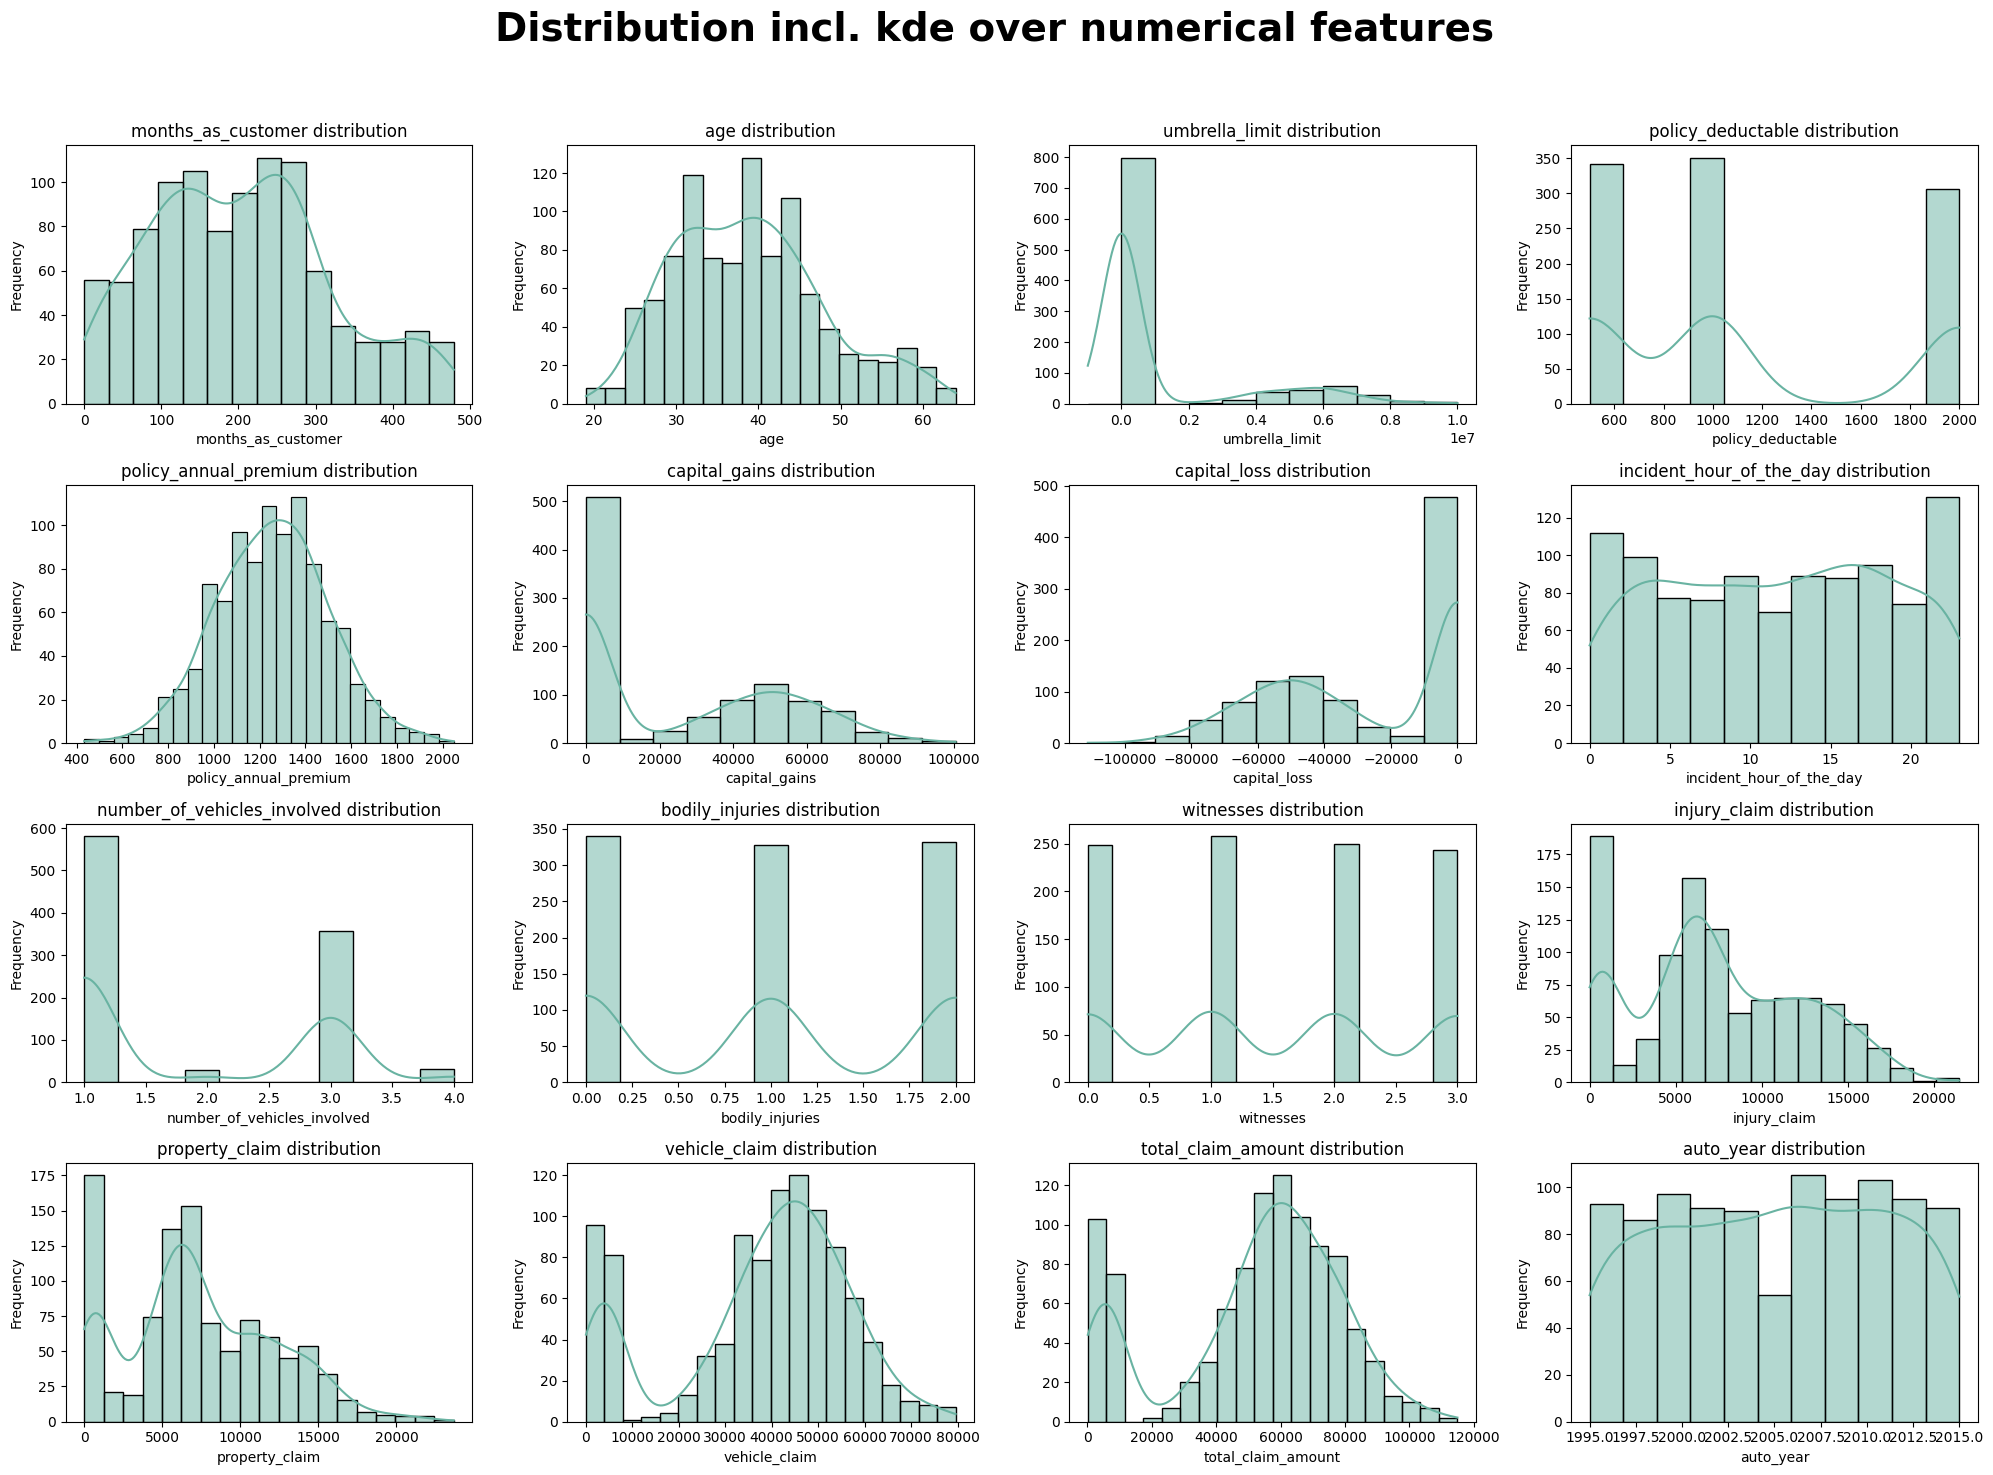

In [ ]:
# Initialize a 4x4 charts
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

num_col = ['months_as_customer','age','umbrella_limit', 'policy_deductable', 'policy_annual_premium', 'capital_gains', 'capital_loss', 'incident_hour_of_the_day', 
           'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim','total_claim_amount', 
           'auto_year']

for i, col in enumerate(num_col):
    sns.histplot(data=df[num_col], x=col, kde=True, ax=axes[i], color ='#69b3a2')
    axes[i].set_title(f'{col} (KDE)')
    
    # Add title and axis label
    axes[i].set_title(f'{col} distribution') 
    axes[i].set_xlabel(col) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
fig.suptitle('Distribution incl. kde over numerical features', fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
display(df[num_col].describe().round(2))
# Show the plot
plt.show()

### Interpretation / Evaluation
- Most numerical features are not normally distributed.
- The feature "policy_annual_premium" is an exception, as it follows a normal distribution.
- Therefore, MinMax scaling is appropriate for this dataset.

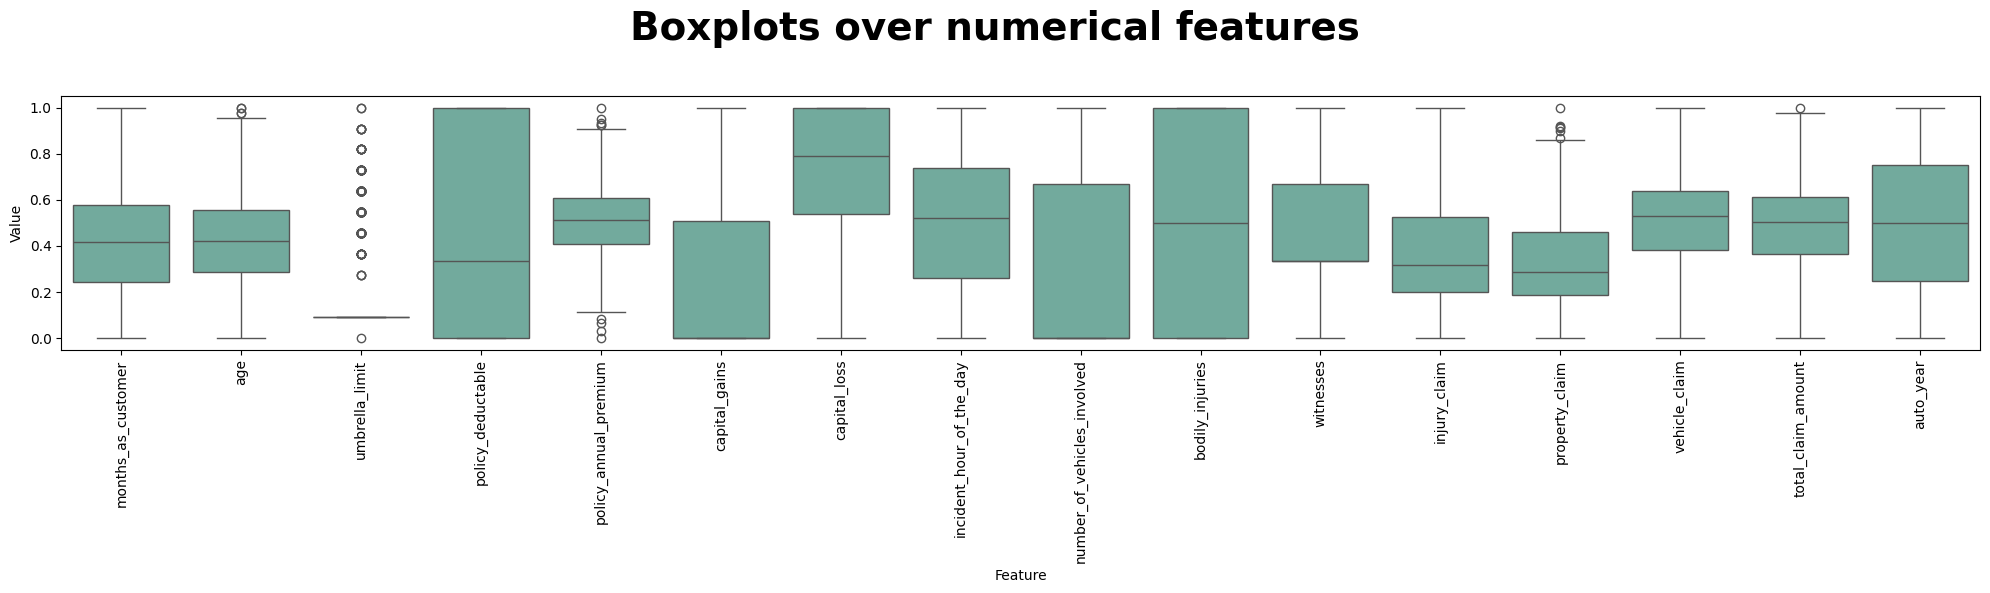

In [97]:
scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[num_col]), columns=num_col)
melted_scaled = scaled.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 6))
sns.boxplot(x='Feature', y='Value', data=melted_scaled, color ='#69b3a2')
plt.xticks(rotation=90)
plt.suptitle('Boxplots over numerical features', fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretation / Evaluation
- The feature "umbrella_limit" contains numerous outliers. Based on the histogram above, the values appear implausible. Therefore, "umbrella_limit" will be dropped from the feature set.
- Other outliers are considered acceptable at this stage. 


In [98]:
df=df.drop("umbrella_limit", axis=1)
df["fraud"]=df['fraud_reported'].apply(lambda x: 1 if str(x)=="Y" else 0)

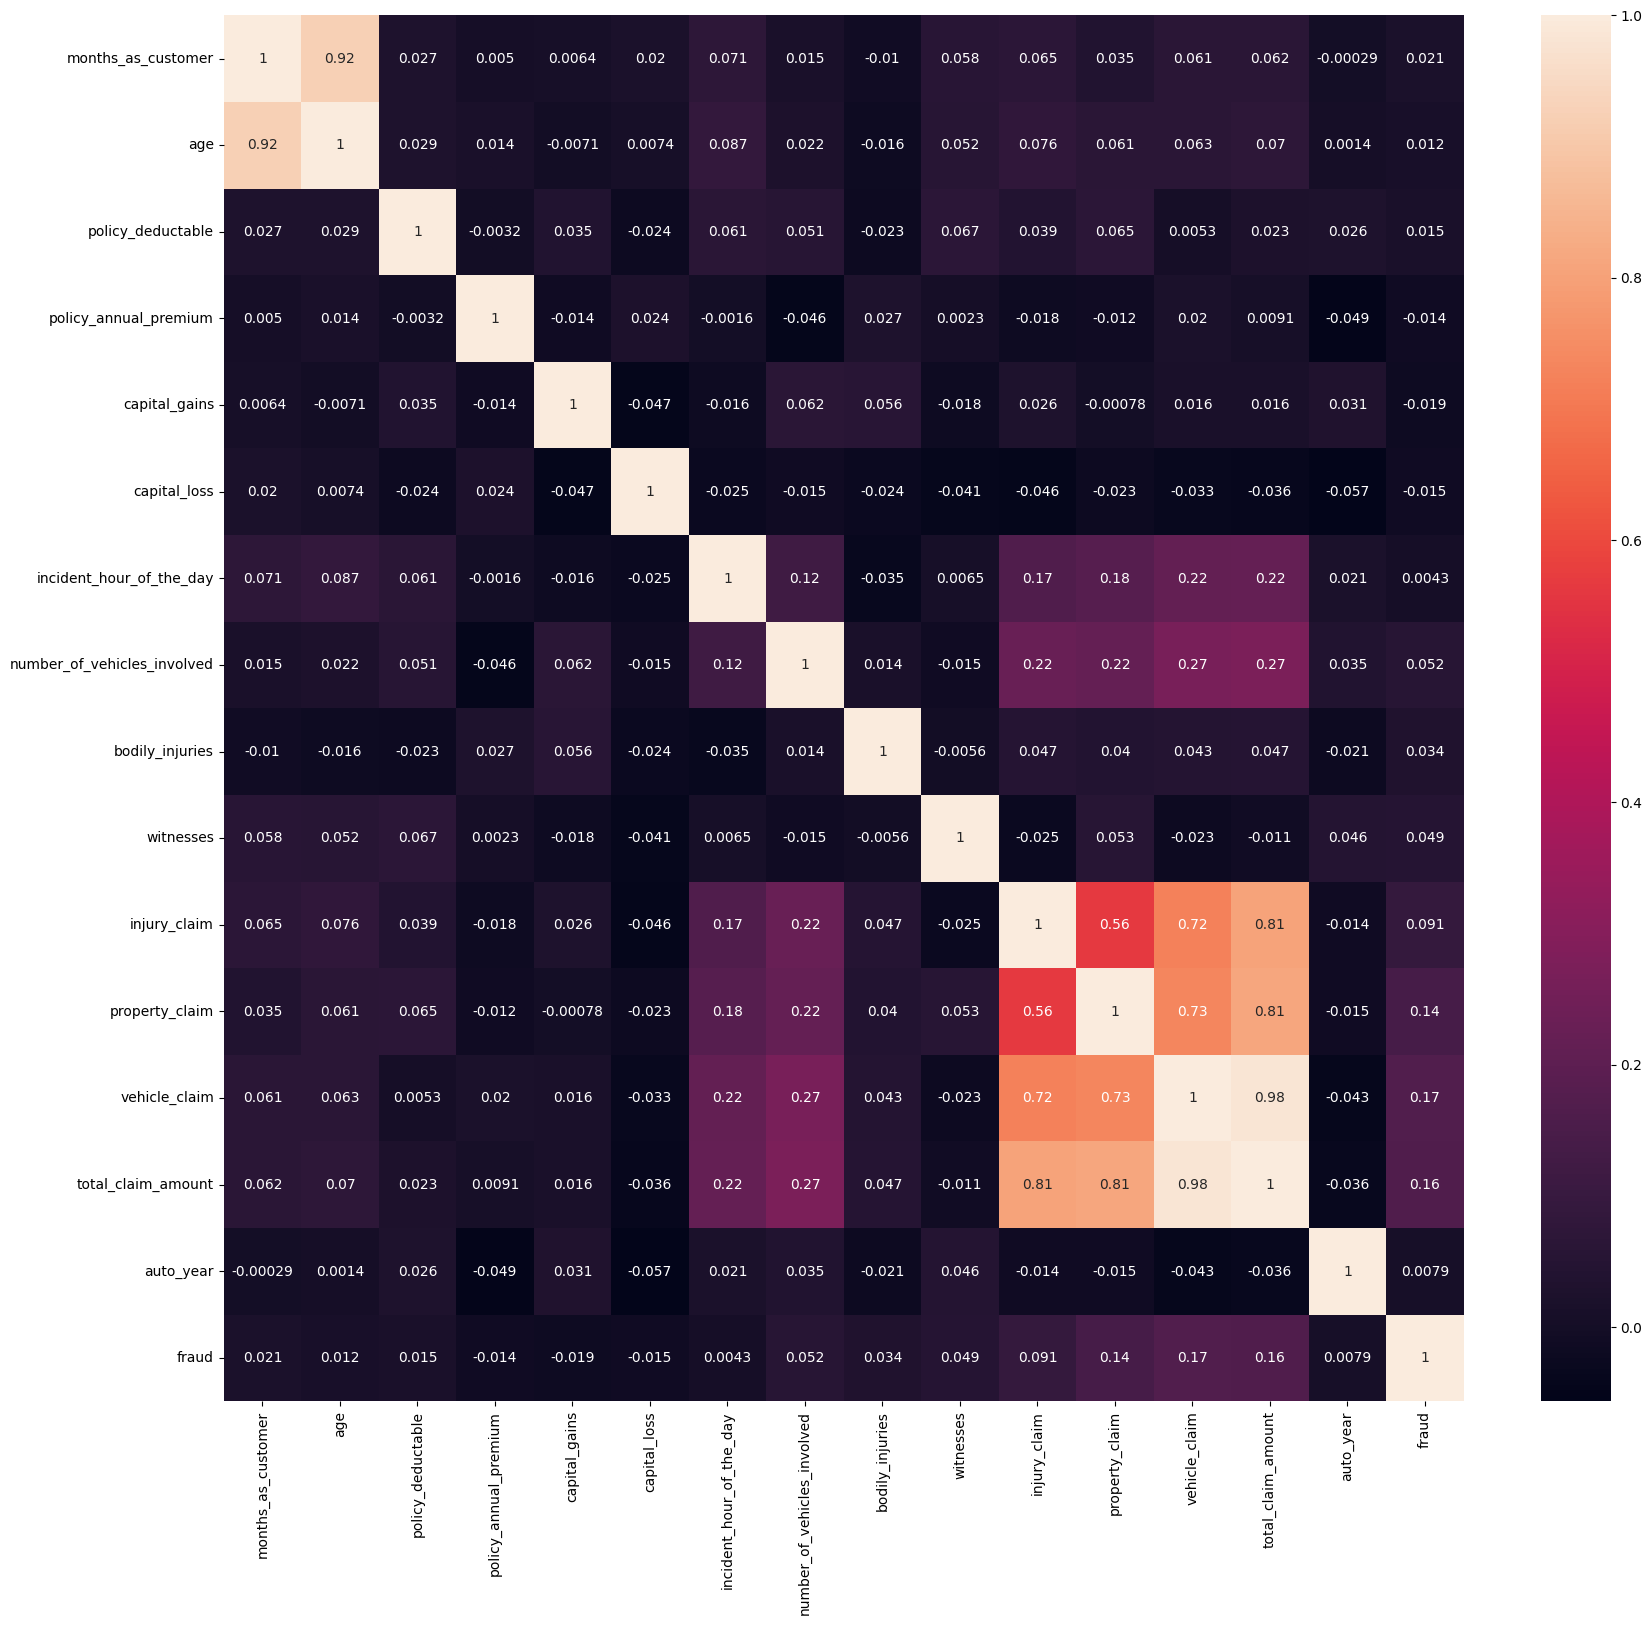

In [99]:
num_col = ['months_as_customer','age','policy_deductable', 'policy_annual_premium', 'capital_gains', 'capital_loss', 'incident_hour_of_the_day', 
           'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim','total_claim_amount', 
           'auto_year', 'fraud']

plt.figure(figsize=(20,18))

sns.heatmap(df[num_col].corr(), annot=True);

### Interpretation / Evaluation
- All claim-related features are highly correlated. To avoid multicollinearity, only "vehicle_claim" will be retained, as it shows the strongest correlation with fraud.
- "Months_as_customer" and "age" also show a high correlation with each other. If needed for model performance, only one of them should be kept.
- Overall, the heatmap does not reveal any strong direct correlation between fraud and the other numerical features.

## 3.2 Categorical Features

In [ ]:
# Drop "inciddent_location" as feature. It has 1000 unique values.
df=df.drop("incident_location", axis=1)

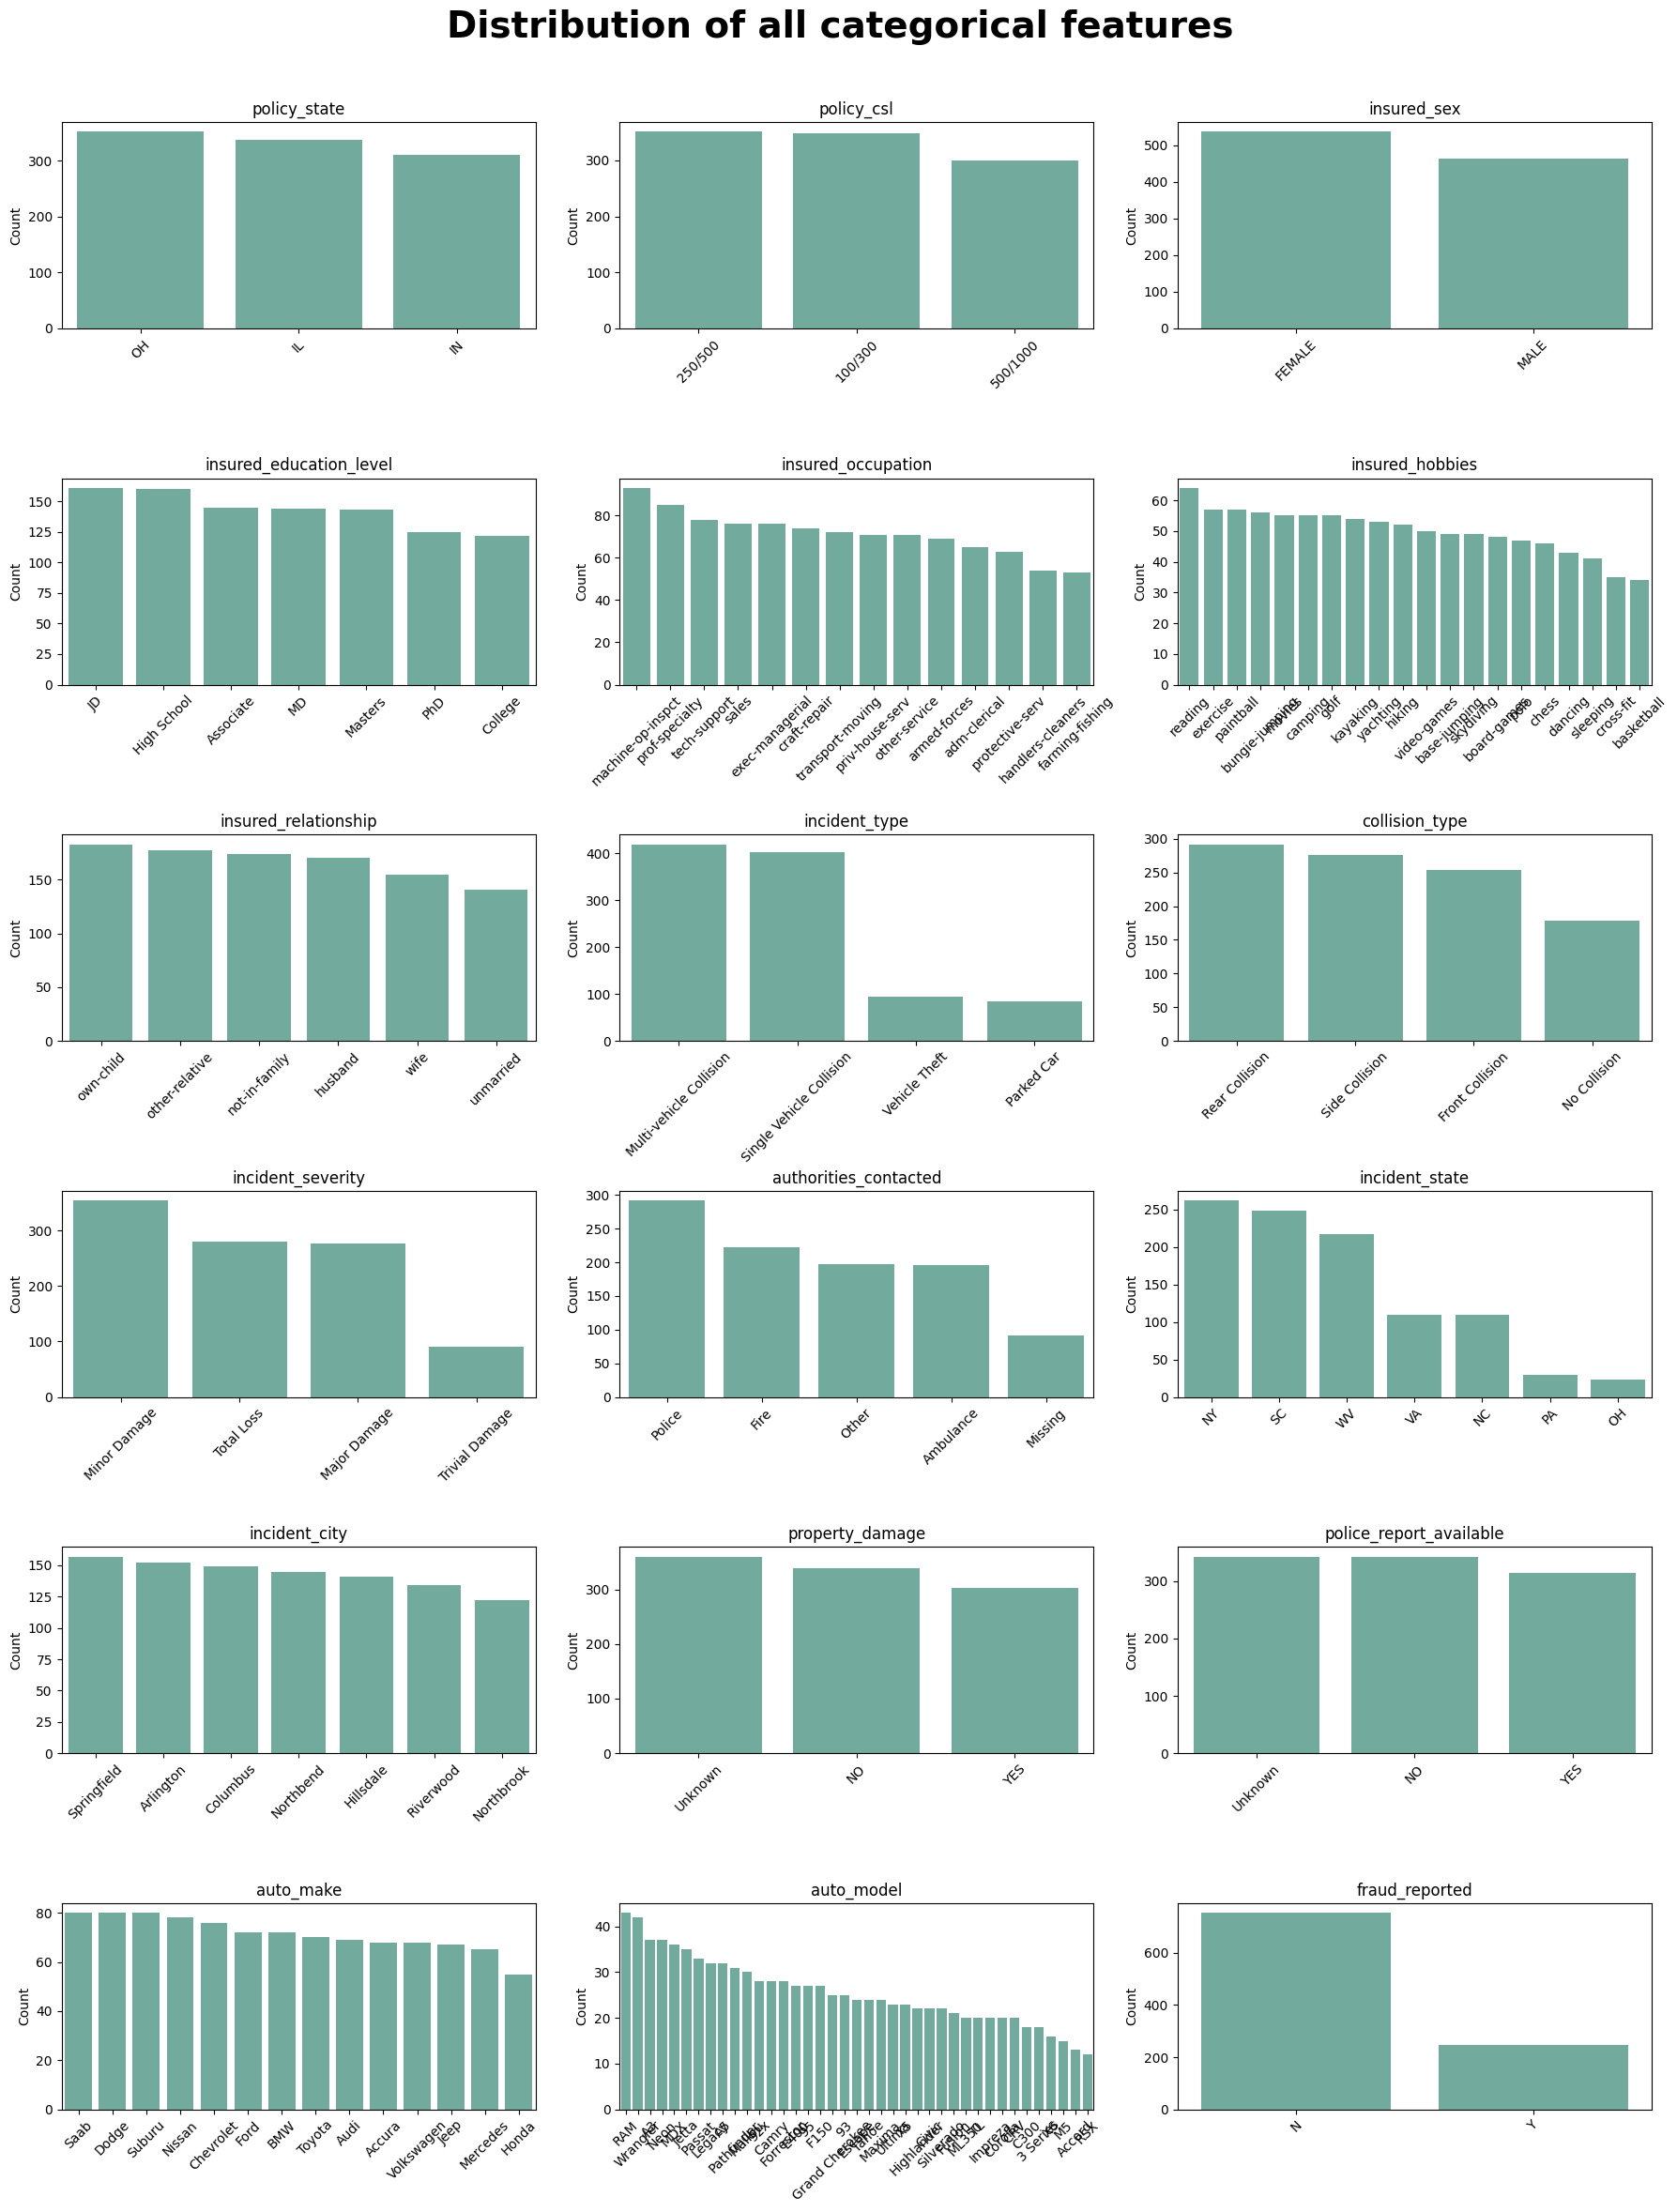

In [ ]:
n_cols = 3  
n_rows = int(np.ceil(len(cat_col) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

for i, col in enumerate(cat_col):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    
    # Plot der Value Counts
    vc = df[col].fillna('Missing').value_counts()
    sns.barplot(x=vc.index, y=vc.values, ax=ax, color='#69b3a2')
    ax.set_title(col)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.suptitle('Distribution of all categorical features', fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.93) 
plt.show()

### Interpretation / Evaluation
- There is nothing special coming up
- Although, we can already identify that target distribution is unbalanced.

# 4. Statistical Test

## 4.1 Numerical features

In [105]:
from sklearn.feature_selection import f_classif, SelectKBest

col_quan=df.select_dtypes(['int64', 'float64']).columns

X = df[col_quan].drop("fraud",axis=1)
y = df["fraud"]

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

print(scores)

                        Feature    F-Score       p-Value
14                vehicle_claim  29.718214  6.297261e-08
11           total_claim_amount  27.463776  1.952936e-07
13               property_claim  19.327729  1.218941e-05
12                 injury_claim   8.328776  3.986262e-03
8   number_of_vehicles_involved   2.689100  1.013520e-01
10                    witnesses   2.451026  1.177651e-01
9               bodily_injuries   1.146656  2.845093e-01
0            months_as_customer   0.421370  5.164037e-01
4                   insured_zip   0.374497  5.407027e-01
5                 capital_gains   0.366990  5.447871e-01
6                  capital_loss   0.220519  6.387475e-01
2             policy_deductable   0.219163  6.397808e-01
3         policy_annual_premium   0.209284  6.474290e-01
1                           age   0.147188  7.013189e-01
15                    auto_year   0.062735  8.022760e-01
7      incident_hour_of_the_day   0.018590  8.915769e-01


In [ ]:
results = []

for col in col_quan:
    if col != 'fraud':
        group0 = df[df['fraud'] == 0][col].dropna()
        group1 = df[df['fraud'] == 1][col].dropna()

        # t-test 
        t_stat, p_ttest = ttest_ind(group0, group1, equal_var=False)

        # Kolmogorov-Smirnov-test
        ks_stat, p_ks = ks_2samp(group0, group1)

        # Mann-Whitney-U-test
        mw_stat, p_mw = mannwhitneyu(group0, group1, alternative='two-sided')

       
        results.append({
            'feature': col,
            'p_ttest': p_ttest,
            'p_ks_2samp': p_ks,
            'p_mannwhitneyu': p_mw
        })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='p_ks_2samp')

display(np.round(results_df,5))

,Feature,p_ttest,p_ks_2samp,p_mannwhitneyu
14,vehicle_claim,0.00000,0.00000,0.00001
11,total_claim_amount,0.00000,0.00001,0.00001
13,property_claim,0.00001,0.00002,0.00002
12,injury_claim,0.00272,0.00154,0.00550
4,insured_zip,0.53617,0.04622,0.05058
10,witnesses,0.10862,0.37730,0.11465
8,number_of_vehicles_involved,0.10848,0.56883,0.10310
0,months_as_customer,0.52790,0.63264,0.63252
7,incident_hour_of_the_day,0.89092,0.68909,0.89568
3,policy_annual_premium,0.65558,0.74139,0.62747


### Interpretation /Evaluation
- Various statistical tests indicate that "vehicle_claim", "total_claim_amount", "property_claim", and "injury_claim" are significant predictors of fraud (p < 0.05).
- The SelectKBest classifier also ranked these claim-related features among the top 4. 
- While "insured_zip" showed some statistical significance, it was ranked ninth by SelectKBest.
- To reduce redundancy and multicollinearity, only "vehicle_claim" will be retained. 

## 4.2 Categorical Features

In [ ]:
chi2test_results = []

for col in df.columns:
    if df[col].dtype == 'object' and col != "fraud_reported":
        contingency_table = pd.crosstab(df[col], df['fraud_reported'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        n = contingency_table.sum().sum()
        k = min(contingency_table.shape)
        
        # Cramér's V
        cramer_v = np.sqrt(chi2 / (n * (k - 1))) if k > 1 else np.nan
        
        chi2test_results.append({
            'feature': col,
            'chi2': chi2,
            'p': p,
            'dof': dof,
            "cramer_v": cramer_v
        })

chi2test_results = pd.DataFrame(chi2test_results)
chi2test_results = chi2test_results.sort_values('p')

chi2test_results

,feature,chi2,p,dof,cramer_v
9,incident_severity,264.237350,5.447034e-57,3,0.514040
5,insured_hobbies,162.315399,8.989147e-25,19,0.402884
8,collision_type,31.365781,7.118898e-07,3,0.177104
7,incident_type,29.131540,2.101334e-06,3,0.170680
11,incident_state,16.129184,1.307713e-02,6,0.127001
13,property_damage,8.031108,1.803296e-02,2,0.089616
10,authorities_contacted,8.279563,4.057387e-02,3,0.095438
16,auto_model,46.658170,1.582646e-01,38,0.216005
4,insured_occupation,17.659340,1.708876e-01,13,0.132888
1,policy_csl,2.136999,3.435237e-01,2,0.046228


### Interpretation /Evaluation
- The Chi² test indicates that "incident_severity", "insured_hobbies", "collision_type", "incident_type", "incident_state", "property_damage", and "authorities_contacted" have a statistically significant relationship with fraud (p < 0.05).
- "Among these, "incident_severity" and "insured_hobbies" show the strongest association with fraud.
- Features with a p-value greater than 0.05 will be dropped.